### Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [2]:
# pip install numpy
# pip install matplotlib
# pip install tqdm
# pip install sklearn

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

Задача. Предсказание баллов ЕГЭ

In [8]:
X = np.array ([[ 1, 1, 500, 1],
               [ 1, 1, 700, 1],
               [ 1, 2, 750, 2],
               [ 1, 5, 600, 1],
               [ 1, 3, 1450, 2],
               [ 1, 0, 800, 1],
               [ 1, 5, 1500, 3],
               [ 1, 10, 2000, 3],
               [ 1, 1, 450, 1],
               [ 1, 2, 1000, 2]])

In [9]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [10]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [11]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


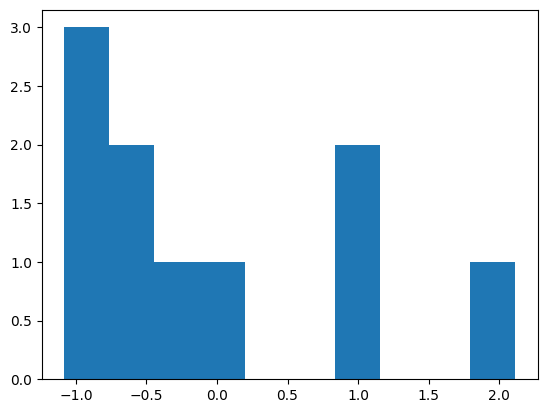

In [12]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [13]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [14]:
W / np.abs(W)
+1 / 1 = +
-1 / 1 = -
0 / 0 = nan

SyntaxError: cannot assign to expression (1529666467.py, line 2)

In [15]:
np.sign(0)

0

In [16]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [17]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [ 0.4331655   1.28203099 -0.6744123  -1.47628344], error 3470.910506149686
Iter: 500, weights: [56.49270012  5.98756816  1.17801949  5.29706538], error 25.322690622336967
Iter: 1000, weights: [56.49499991  6.18613078  0.19588878  6.1123546 ], error 24.958940688831813
Iter: 1500, weights: [56.495       6.24948577 -0.12980025  6.38902157], error 24.913617915049223
Iter: 2000, weights: [56.495       6.2704478  -0.23659485  6.47827372], error 24.907128982311153
Iter: 2500, weights: [56.495       6.27837578 -0.27515493  6.51015748], error 24.905784789856725
Iter: 3000, weights: [56.495       6.28124898 -0.28904046  6.5216214 ], error 24.905429579962846
Iter: 3500, weights: [56.495       6.28228417 -0.29403876  6.52574711], error 24.905318399462676
Iter: 4000, weights: [56.495       6.28265683 -0.29583787  6.52723209], error 24.905280541807425
Iter: 4500, weights: [56.495       6.28279097 -0.29648544  6.52776659], error 24.905267195243848
Final MSE: 24.905262427535963


array([56.495     ,  6.28283919, -0.29671826,  6.52795876])

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [18]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [19]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [20]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [21]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [22]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [23]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

3 Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [24]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

ModuleNotFoundError: No module named 'sklearn'

In [25]:
X = standard_scale(X)

In [26]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1])
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02])

Стохастический градиентный спуск

In [28]:
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

Градиентный спуск

In [29]:
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) 
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [30]:
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

NameError: name 'errors_GD' is not defined

In [31]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

NameError: name 'w_list_GD' is not defined

In [ ]:
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()